In [1]:
setdefaults

In [2]:
%plot --format svg

In [14]:
pkg load odepkg

# Initial Value Problems (continued)
*ch. 23 - Adaptive methods*

## Predator-Prey Models (Chaos Theory)

Predator-prey models were developed independently in the early part of the twentieth
century by the Italian mathematician Vito Volterra and the American biologist Alfred
Lotka. These equations are commonly called Lotka-Volterra equations. The simplest version is the following pairs of ODEs:

$\frac{dx}{dt}=ax-bxy$

$\frac{dy}{dt}=-cy+dxy$

where x and y = the number of prey and predators, respectively, a = the prey growth rate, c = the predator death rate, and b and d = the rates characterizing the effect of the predator-prey interactions on the prey death and the predator growth, respectively.

```matlab
function yp=predprey(t,y,a,b,c,d)
    % predator-prey model (Lotka-Volterra equations)
    yp=zeros(1,2);
    x=y(1); % population in thousands of prey
    y=y(2); % population in thousands of predators
    yp(1)=a.*x-b.*x.*y; % population change in thousands of prey/year
    yp(2)=-c*y+d*x.*y; % population change in thousands of predators/year
end
```

In [4]:
predprey(1,[20 1],a,b,c,d)

ans =

   12.0000
    5.2000



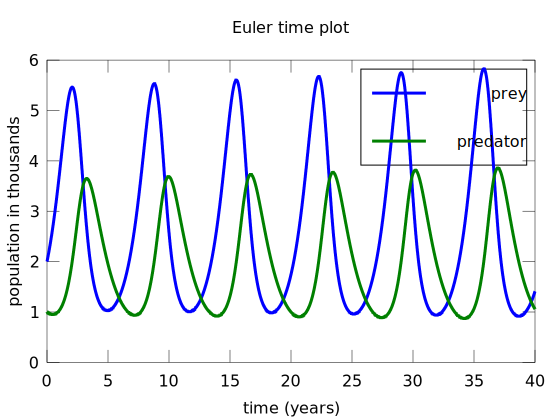

In [42]:
h=0.00625;tspan=[0 40];y0=[2 1];
a=1.2;b=0.6;c=0.8;d=0.3;
[t y] = eulode(@predprey,tspan,y0,h,a,b,c,d);

plot(t,y(:,1),t,y(:,2),'--')
legend('prey','predator');
title('Euler time plot')
xlabel('time (years)')
ylabel('population in thousands')

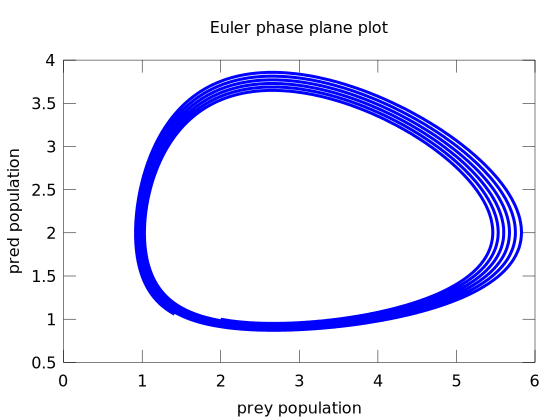

In [23]:
plot(y(:,1),y(:,2))
title('Euler phase plane plot')
xlabel('thousands of prey')
ylabel('thousands of predators')

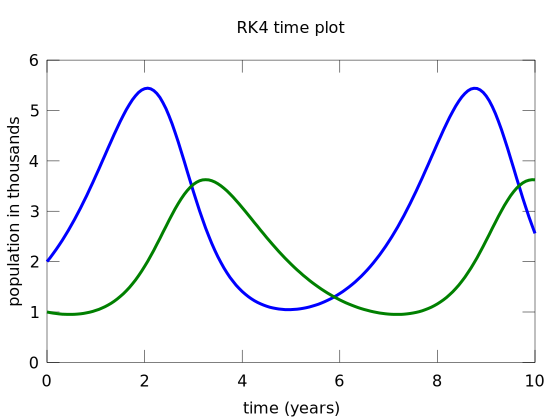

In [43]:
h=0.0625;tspan=[0 40];y0=[2 1];
a=1.2;b=0.6;c=0.8;d=0.3;
tspan=[0 10];
[t y] = rk4sys(@predprey,tspan,y0,h,a,b,c,d);
plot(t,y(:,1),t,y(:,2),'--')
title('RK4 time plot')
xlabel('time (years)')
ylabel('population in thousands')

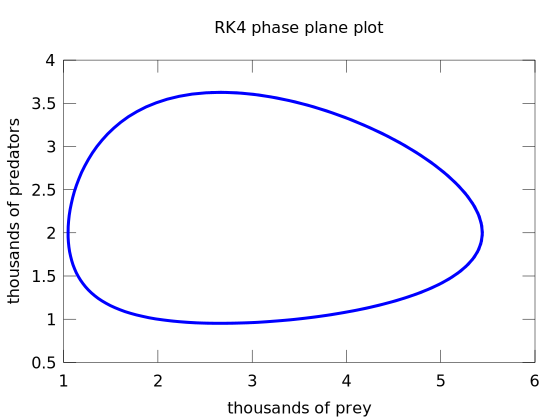

In [44]:
plot(y(:,1),y(:,2))
title('RK4 phase plane plot')
xlabel('thousands of prey')
ylabel('thousands of predators')

## Adaptive Runge-Kutta Methods


In [27]:
help ode23

'ode23' is a function from the file /home/ryan/octave/odepkg-0.8.5/ode23.m

 -- Function File: [] = ode23 (@FUN, SLOT, INIT, [OPT], [PAR1, PAR2,
          ...])
 -- Command: [SOL] = ode23 (@FUN, SLOT, INIT, [OPT], [PAR1, PAR2, ...])
 -- Command: [T, Y, [XE, YE, IE]] = ode23 (@FUN, SLOT, INIT, [OPT],
          [PAR1, PAR2, ...])

     This function file can be used to solve a set of non-stiff ordinary
     differential equations (non-stiff ODEs) or non-stiff differential
     algebraic equations (non-stiff DAEs) with the well known explicit
     Runge-Kutta method of order (2,3).

     If this function is called with no return argument then plot the
     solution over time in a figure window while solving the set of ODEs
     that are defined in a function and specified by the function handle
     @FUN.  The second input argument SLOT is a double vector that
     defines the time slot, INIT is a double vector that defines the
     initial values of the states, OPT can optionally be a st

In [ ]:
h=0.00625;tspan=[0 40];y0=[2 1];
a=10;b=0.6;c=0.8;d=0.3;

[t23 y23] = ode23(@(t,y) predprey(t,y,a,b,c,d),tspan,y0);
[t45,y45] = ode45(@(t,y) predprey(t,y,a,b,c,d),tspan,y0);
plot(y23(:,1),y23(:,2),'.',y45(:,1),y45(:,2),'k-')
title('Phase plot: ode23- vs ode45--')
xlabel('thousands of prey')
ylabel('thousands of predators')
legend('ode23','ode45')